In [ ]:
# Importando os pacotes:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')


# **Analise exploratoria**

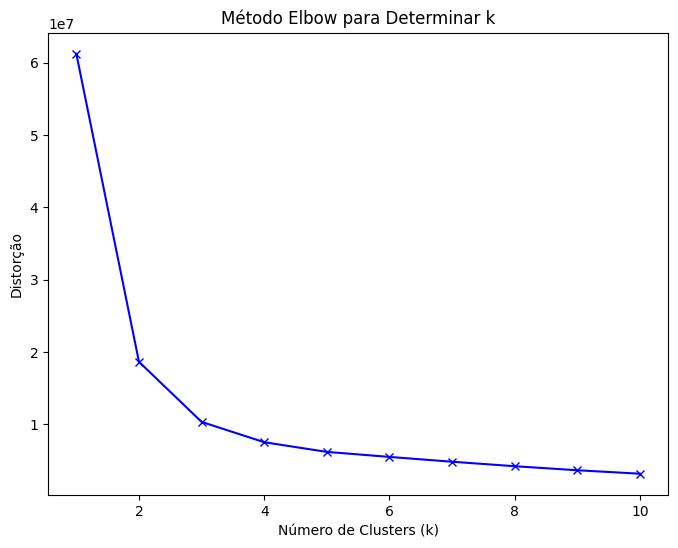

In [ ]:
# Carga de dados
df = pd.read_csv('/content/sample_data/heart_attack_prediction_dataset.csv')
# Supondo que você deseje usar as colunas 'Age' e 'Cholesterol' para o K-Means, ajuste conforme necessário
features_for_kmeans = ['Age', 'Cholesterol']

# Inicializando a lista de distorções
distortions = []

# Testando diferentes valores de k
K = range(1, 11)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[features_for_kmeans])
    distortions.append(kmeanModel.inertia_)

# Plotando o gráfico do Método Elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorção')
plt.title('Método Elbow para Determinar k')
plt.show()


In [ ]:
# O valor de K é igual a 3

In [ ]:
# Escolha do número de clusters (k)
chosen_k = 3  # Escolha um valor de k com base no gráfico do Método Elbow

# Treinando o modelo com o número escolhido de clusters
kmeanModel = KMeans(n_clusters=chosen_k)
kmeanModel.fit(df[features_for_kmeans])  # Certifique-se de usar as colunas corretas para o K-Means

# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels


In [ ]:
# Obtendo os rótulos dos clusters para cada ponto de dados
cluster_labels = kmeanModel.labels_

In [ ]:
# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

In [ ]:
# Calculando o Silhouette Score para avaliar a qualidade dos clusters
silhouette_avg = silhouette_score(df[features_for_kmeans], cluster_labels)
print(f"Silhouette Score para {chosen_k} clusters: {silhouette_avg:.2f}")


Silhouette Score para 3 clusters: 0.49


In [ ]:
print(df.describe())


               Age  Cholesterol   Heart Rate     Diabetes  Family History  \
count  8763.000000  8763.000000  8763.000000  8763.000000     8763.000000   
mean     53.707977   259.877211    75.021682     0.652288        0.492982   
std      21.249509    80.863276    20.550948     0.476271        0.499979   
min      18.000000   120.000000    40.000000     0.000000        0.000000   
25%      35.000000   192.000000    57.000000     0.000000        0.000000   
50%      54.000000   259.000000    75.000000     1.000000        0.000000   
75%      72.000000   330.000000    93.000000     1.000000        1.000000   
max      90.000000   400.000000   110.000000     1.000000        1.000000   

           Smoking      Obesity  Alcohol Consumption  Exercise Hours Per Week  \
count  8763.000000  8763.000000          8763.000000              8763.000000   
mean      0.896839     0.501426             0.598083                10.014284   
std       0.304186     0.500026             0.490313           

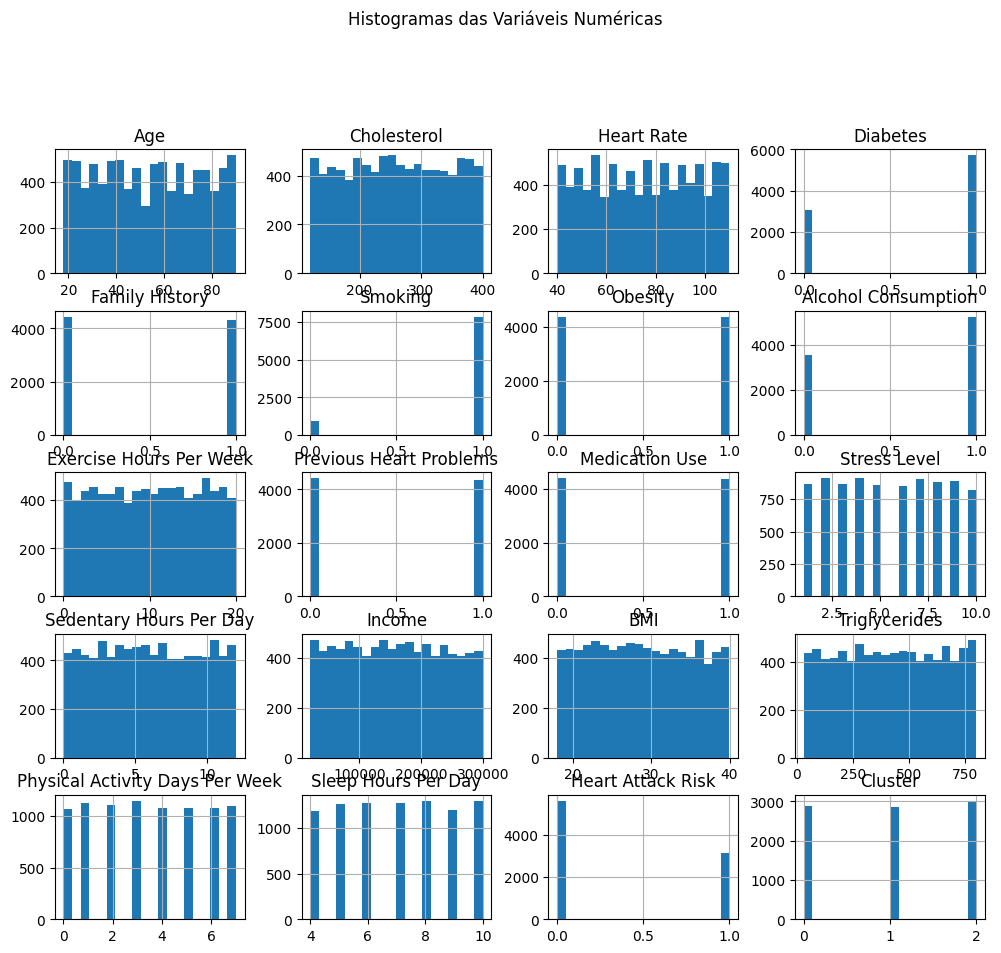

In [ ]:
#Criar um conjunto de histogramas que mostram a distribuição das variáveis
df.hist(figsize=(12, 10), bins=20)
plt.suptitle('Histogramas das Variáveis Numéricas', y=1.02)
plt.show()


# **Utilizando a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresentando os resultados**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Selecionando as colunas para aplicar o PCA
features_for_pca = ['Age', 'Cholesterol']


In [ ]:
# Normalizando os dados antes de aplicar o PCA (opcional, mas muitas vezes recomendado)
df_normalized = (df[features_for_pca] - df[features_for_pca].mean()) / df[features_for_pca].std()

In [ ]:
# Aplicando o PCA com o número desejado de componentes principais
num_components = 2  # Ajuste conforme necessário
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_normalized)

In [ ]:
# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
# Adicionando os rótulos dos clusters ao DataFrame PCA
pca_df['Cluster'] = cluster_labels

# Visualizando as primeiras linhas do DataFrame PCA com os rótulos dos clusters
print(pca_df.head())

        PC1       PC2  Cluster
0  0.895949 -0.011328        0
1 -2.217514  0.040708        1
2 -1.649123 -0.527683        1
3 -0.068635  2.084653        1
4 -0.099219  0.917287        1


In [ ]:
# Visualizando a variância explicada por cada componente principal
explained_var_ratio = pca.explained_variance_ratio_
print(f"Variância explicada pelo PC1: {explained_var_ratio[0]:.2f}")
print(f"Variância explicada pelo PC2: {explained_var_ratio[1]:.2f}")

Variância explicada pelo PC1: 0.50
Variância explicada pelo PC2: 0.50


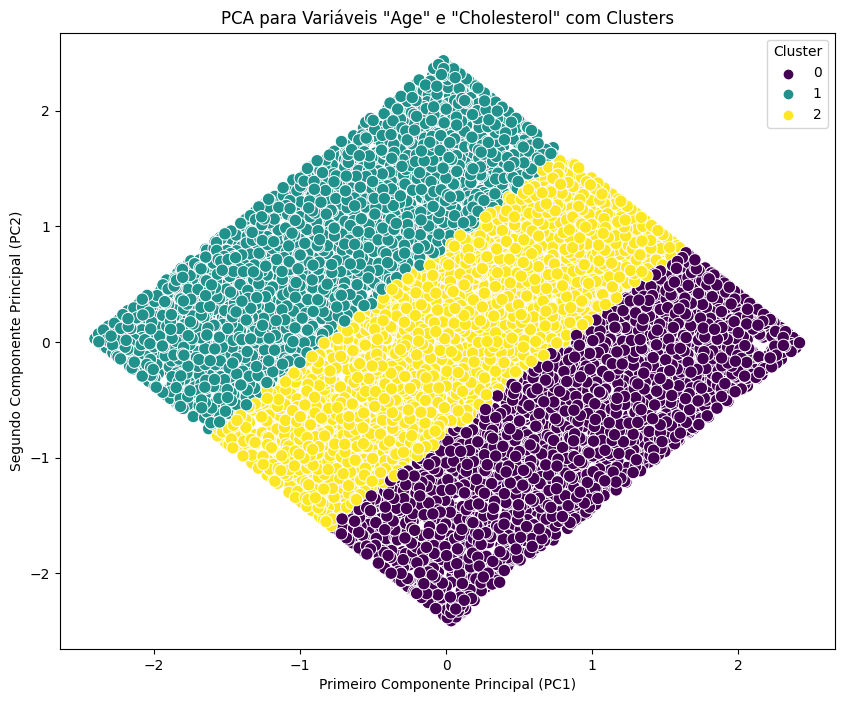

In [ ]:
# Plotando o gráfico de dispersão dos componentes principais com cores representando os clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=80)
plt.title('PCA para Variáveis "Age" e "Cholesterol" com Clusters')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.show()

In [ ]:
# Dividindo os dados em conjuntos de treinamento e teste
X_treino_pca, X_teste_pca, y_treino, y_teste = train_test_split(pca_df[['PC1', 'PC2']], df['Cluster'], test_size=0.2, random_state=42)

In [ ]:
# Aplicando o algoritmo KNN nos dados reduzidos pelo PCA
knn = KNeighborsClassifier(n_neighbors=3)  # Defina o número de vizinhos desejado
knn.fit(X_treino_pca, y_treino)  # Treine o modelo com os dados de treinamento reduzidos pelo PCA
y_pred = knn.predict(X_teste_pca)  # Faça previsões usando os dados de teste reduzidos pelo PCA


In [ ]:
# Avaliando o desempenho do KNN
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do KNN nos dados de teste após o PCA: {accuracy:.2f}")

Acurácia do KNN nos dados de teste após o PCA: 0.99


In [ ]:
# Cálculo da variância explicada pelo PCA
explained_variance_ratio = pca.explained_variance_ratio_
total_variance = explained_variance_ratio.sum()
print(f"O modelo PCA com {num_components} variáveis explica {100 * total_variance:.2f}% dos dados de entrada")

O modelo PCA com 2 variáveis explica 100.00% dos dados de entrada
